# Exploratory Data Visualization
---

Sometimes a classic table with data can't represent the data itself. In order to visualize the data we use different charts or plots or other types of visualization. For now we'll focus on **line charts**.

### Line charts
---

The given dataset is `unrate.csv` (a [time series](https://en.wikipedia.org/wiki/Time_series) dataset, which means the data points (monthly unemployment rates) are ordered by time), which has the monthly unemployment rate as a CSV from January 1948 to August 2016.
First of all we'll need to read the dataset using pandas library:

In [1]:
import pandas as pd

unrate = pd.read_csv("unrate.csv")
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


We now need to convert the `DATE` column to `datetime` type, using the [`pandas.to_datetime()`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) **function** (returns a Series object with the datetime data type that we can assign back to the DataFrame):

In [2]:
unrate["DATE"] = pd.to_datetime(unrate["DATE"])
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


The date format is YYYY-MM-DD. The `VALUE` column has corresponding to the dates rates (percents). The rates above demonstrate the tendency during the 1948. Try to see some clues there (always try to see them inspecting data).

Because the table only contained the data from 1948, it didn't take too much time to identify some observations (like the maximum/lowest rates or the growing/declining trends etc.). If we scale up the table to include all 824 rows, it would be very time-consuming and painful to understand. This is when the visualization methods shine.

Line charts work best when there is a logical connection between adjacent points. In our case, that connection is the flow of time. Between 2 reported monthly unemployment values, the unemployment rate is fluctuating and time is passing. Soon we'll see how it actually looks like.

To create the line chart, we'll use the [matplotlib](https://matplotlib.org/) library, which allows us to:

* quickly create common plots using high-level functions
* extensively tweak plots
* create new kinds of plots from the ground up

When working with commonly used plots in matplotlib, the general workflow is:

* create a plot using data
* customize the appearance of the plot
* display the plot
* edit and repeat until satisfied

The [pyplot](https://matplotlib.org/api/pyplot_api.html) module provides a high-level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

In [3]:
import matplotlib.pyplot as plt

One of the most common functions of the pyplot module are [`plt.plot()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`plt.show()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show). We don't have to assign the plot to a variable and then call a method on the variable to display it. We instead can call 2 functions on the pyplot module directly.

This is because every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). When we call `show()`, the plot is displayed and the internal state is destroyed. Here's how it works:

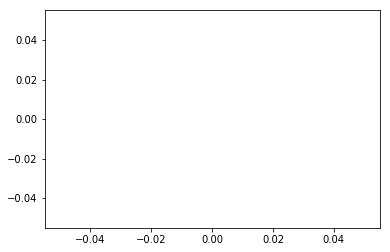

In [4]:
plt.plot() # plots an empty plot
plt.show() # displays the plot (it's empty q~q)

Basic syntax of the `plt.plot()` function looks like this:

```python
plt.plot(x_values, y_values)
```

The function takes any iterable object as it's input, so the NumPy `Series` will be just fine.

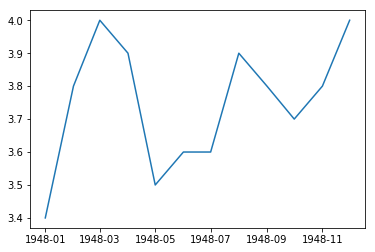

In [5]:
# Assigned first 12 rows to a variable just for easy reference.
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.show()

We can rotate the x-axis tick labels by 90 degrees (sometimes it's useful if you have many labels). The `xticks()` function within pyplot lets you customize the behavior of the x-axis ticks. If you head over to the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) for that function, it's not immediately obvious the arguments it takes:

```python
matplotlib.pyplot.xticks(*args, **kwargs)
```

In the documentation for the function, you'll see a link to the matplotlib [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) class, which is what pyplot uses to represent the x-axis tick labels. You'll notice that there's a rotation parameter that accepts degrees of rotation as a parameter. We can specify degrees of rotation using a float or integer value.

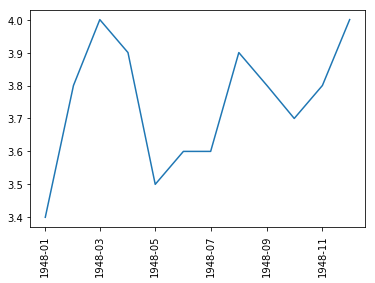

In [6]:
plt.plot(first_twelve["DATE"], first_twelve["VALUE"])
plt.xticks(rotation = 90)
plt.show()

Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road. Also now let's plot the whole data.

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

* [`xlabel()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel): accepts a string value, which gets set as the x-axis label
* [`ylabel()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel): accepts a string value, which is set as the y-axis label
* [`title()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title): accepts a string value, which is set as the plot title

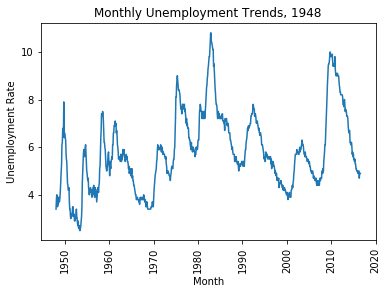

In [7]:
plt.plot(unrate["DATE"], unrate["VALUE"])
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

P.S. There are great [tutorials](https://matplotlib.org/tutorials/index.html) on the matplotlib site. Just saying.

---

### Multiple plots
---

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. 

Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

* a container for all plots was created (returned as a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure))
* a container for the plot was positioned on a grid (the plot returned as an [Axes object](http://matplotlib.org/api/axes_api.html#matplotlib-axes))
* visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling [`pyplot.figure()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure):

```python
fig = plt.figure()
```



Instead of only calling the pyplot function, we assigned its return value to a variable (`fig`). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot. The Axes object acts as its own container for the various components of the plot, such as:

* values on the x-axis and y-axis
* ticks on the x-axis and y-axis
* all visual symbols, such as:
    * markers
    * lines
    * gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use [`Figure.add_subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot). This will return a new Axes object, which needs to be assigned to a variable:

```python
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

If we want the figure to contain 2 plots, one above the other, we need to write:

```python
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using `plt.show()`:

```python
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()
```

Let's create a figure, add subplots to it, and display it:

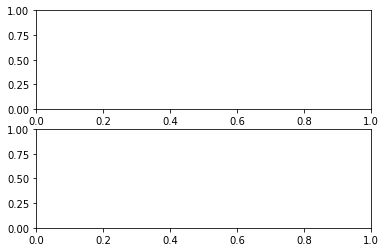

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

Let's see another example of 4 plots (in 2x2 matrix):

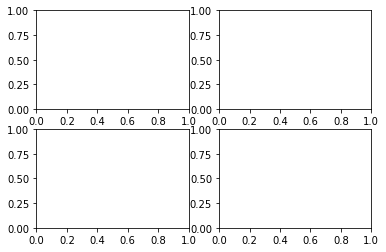

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # upper-left
ax2 = fig.add_subplot(2,2,2) # upper-right
ax3 = fig.add_subplot(2,2,3) # down-left
ax4 = fig.add_subplot(2,2,4) # down-right
plt.show()

To generate a line chart within an Axes object, we need to call [`Axes.plot()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) and pass in the data you want plotted:

```python
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```

Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call `Axes.plot()` and pass in the data we want to use in that plot.

Let's use our dataset with this knowledge:

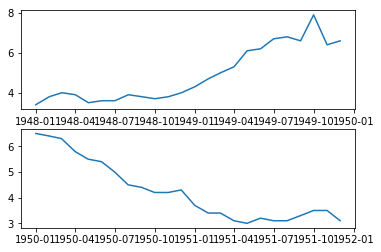

In [10]:
fig = plt.figure()

ax_1948 = fig.add_subplot(2, 1, 1)
ax_1949 = fig.add_subplot(2, 1, 2)

ax_1948.plot(unrate[0:24]["DATE"], unrate[0:24]["VALUE"]) # data from 1948-1949
ax_1949.plot(unrate[24:48]["DATE"], unrate[24:48]["VALUE"]) # data from 1949-1950

plt.show()

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots a little bit hard to interpret. Let's fix it using the `figsize` argument of a `plt.figure()` method.

```python
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The figsize parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues. Let's set the width of the plotting area to 12 inches and the height to 8 inches and add titles (using [`ax.set_title()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html) method).

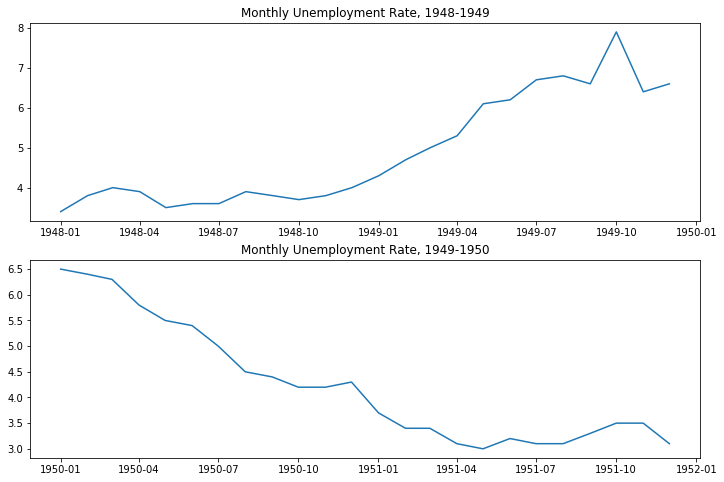

In [11]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:24]["DATE"], unrate[0:24]["VALUE"])
ax1.set_title("Monthly Unemployment Rate, 1948-1949")
ax2.plot(unrate[24:48]["DATE"], unrate[24:48]["VALUE"])
ax2.set_title("Monthly Unemployment Rate, 1949-1950")
plt.show()

Let's visualize data from a few more years to see if we find any evidence for seasonality between those years.

In [12]:
def build_plots(nplots):
    fig = plt.figure(figsize = (12, nplots * 4))
    for nplot in range(nplots):
        fig.add_subplot(
            nplots, 1, nplot + 1, title = "Monthly Unemployment Rate, " + str(nplot + 1948)
        ).plot(
            unrate[nplot * 12: (1 + nplot) * 12]["DATE"], unrate[nplot * 12: (1 + nplot) * 12]["VALUE"]
        )
    return plt.show()

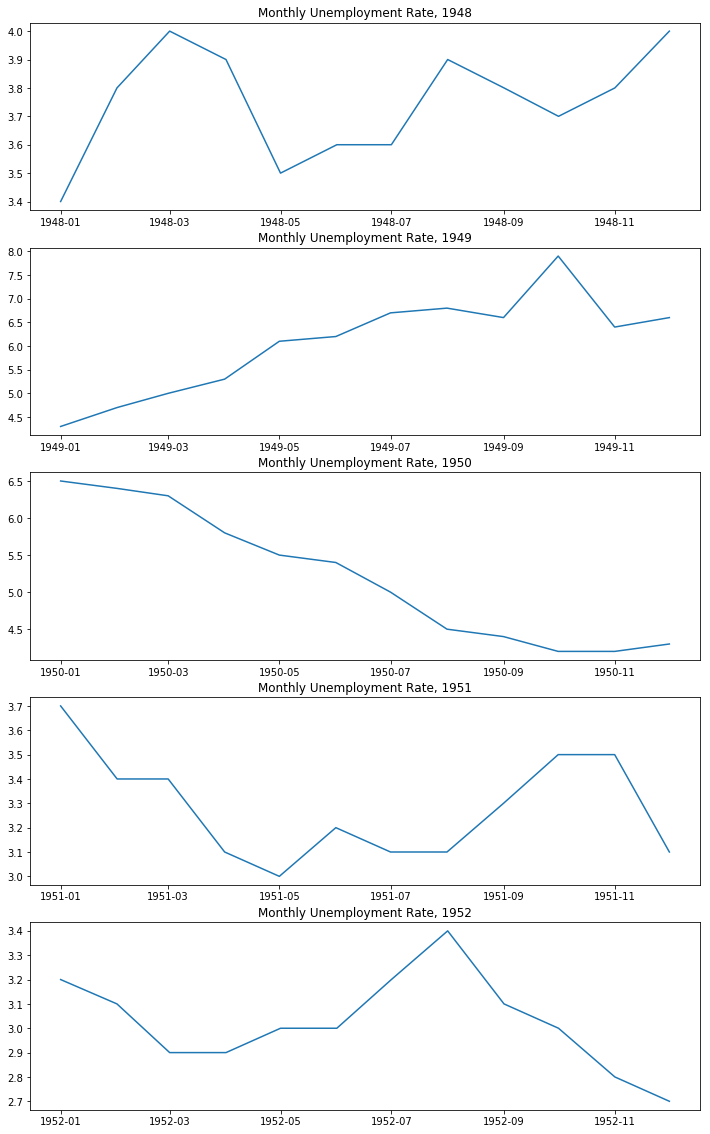

In [13]:
build_plots(5)

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the `DATE` column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the `DATE` column and assign them to a new column, we can use the [`pandas.Series.dt`](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dt-accessors) accessor:

```python
unrate['MONTH'] = unrate['DATE'].dt.month
```



Calling `pandas.Series.dt.month` returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.). Under the hood, pandas applies the [datetime.month](https://docs.python.org/3/library/datetime.html#datetime.date.month) attribute from the [`datetime.date`](https://docs.python.org/3/library/datetime.html#datetime.date) class over each datetime value in the `DATE` column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

We've called `pyplot.plot()` to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.



By default, matplotlib will select a different color for each line. To specify the color ourselves, use the [`c`](http://matplotlib.org/api/colors_api.html) parameter when calling `plot()`.

Let's plot 2 lines on one area:

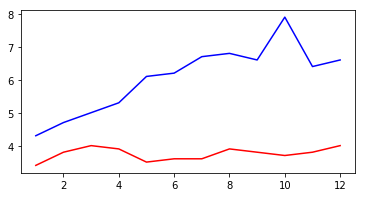

In [14]:
unrate["MONTH"] = unrate["DATE"].dt.month

fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]["MONTH"], unrate[0:12]["VALUE"], c = "red")
plt.plot(unrate[12:24]["MONTH"], unrate[12:24]["VALUE"], c = "blue")

plt.show()

In [15]:
def build_lines_plot(nlines):
    fig = plt.figure(figsize = (10, 6))
    for nline in range(nlines):
        plt.plot(unrate[nline * 12: (1 + nline) * 12]["MONTH"], unrate[nline * 12: (1 + nline) * 12]["VALUE"])
    return plt.show()

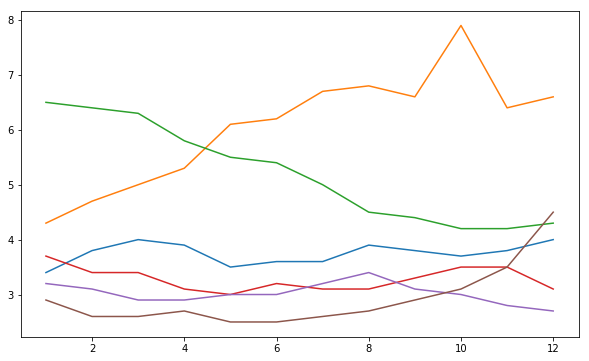

In [16]:
build_lines_plot(6)

How colorful! By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for orange and 7% to 4% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

To help remind us which year each line corresponds to, we can add a **legend** that links each color to the year the line is representing.

When we generate each line chart, we need to specify the text label we want each color linked to. The `pyplot.plot()` function contains a `label` parameter, which we use to set the year value.


We can create the legend using [`pyplot.legend`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and specify its location using the `loc` parameter:

```python
plt.legend(loc='upper left')
```

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use `plt.plot()` and `plt.legend()`, the `Axes.plot()` and [`Axes.legend()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.legend) methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use `Axes.legend()` instead.

Let's now add a legend for the plot we generated:

In [17]:
def build_lines_plot(nlines):
    fig = plt.figure(figsize = (10, 6))
    for nline in range(nlines):
        plt.plot(unrate[nline * 12: (1 + nline) * 12]["MONTH"], 
                 unrate[nline * 12: (1 + nline) * 12]["VALUE"], 
                 label = str(nline + 1948)
                )
    plt.legend(loc = "upper left")
    return plt.show()

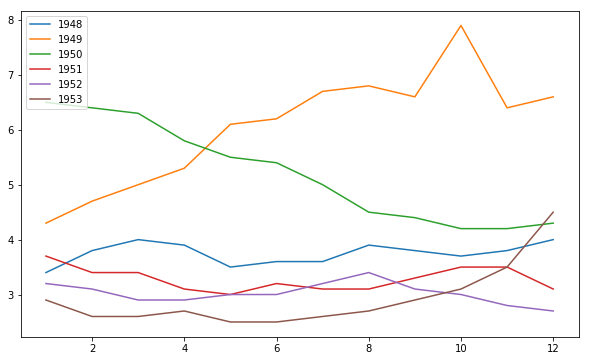

In [18]:
build_lines_plot(6)

Let's enhance the visualization by adding a title and labels for both axes. To set the title, we use [`pyplot.title()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) and pass in a string value.

To set the x-axis and y-axis labels, we use [`pyplot.xlabel()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel) and [`pyplot.ylabel()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel). Both of these methods accept string values.

In [19]:
def build_lines_plot(nlines):
    fig = plt.figure(figsize = (10, 6))
    for nline in range(nlines):
        plt.plot(unrate[nline * 12: (1 + nline) * 12]["MONTH"], 
                 unrate[nline * 12: (1 + nline) * 12]["VALUE"], 
                 label = str(nline + 1948)
                )
    plt.legend(loc = "upper left")
    plt.xlabel("Month, Integer")
    plt.ylabel("Unemployment Rate, Percent")
    plt.title("Monthly Unemployment Trends, 1948-" + str(1947 + nlines))
    return plt.show()

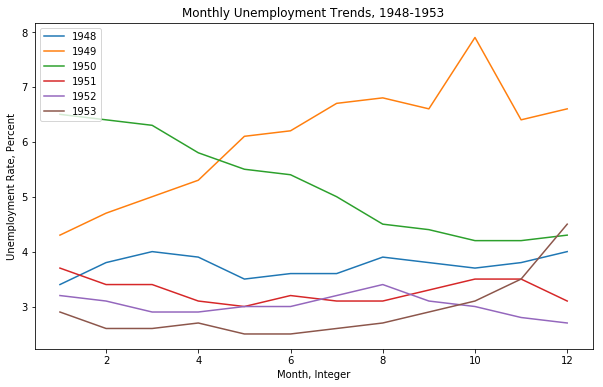

In [20]:
build_lines_plot(6)

That's kinda it for now!

---

### Bar Plots And Scatter Plots
---

We'll be working with a dataset (`fandango_scores.csv`) that has no particular order.

Here are the columns we'll be working with:

* FILM - film name
* RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* Metacritic_user_nom - average user rating from Metacritc, normalized to a 1 to 5 point scale
* IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale
* Fandango_Ratingvalue - average user rating from Fandango, normalized to a 1 to 5 point scale
* Fandango_Stars - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Let's work with the normalized ratings and the Fandango ratings. Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings.

In [21]:
import pandas as pd

reviews = pd.read_csv("fandango_scores.csv")

norm_reviews = reviews[["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]]

norm_reviews.iloc[0]

FILM                    Avengers: Age of Ultron (2015)
RT_user_norm                                       4.3
Metacritic_user_nom                               3.55
IMDB_norm                                          3.9
Fandango_Ratingvalue                               4.5
Fandango_Stars                                       5
Name: 0, dtype: object

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a **bar plot**.

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing. Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for Avengers: Age of Ultron (2015):

To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. We'll focus on positioning the bars on the x-axis now and on positioning the x-axis labels later. We can generate a vertical bar plot using either [`pyplot.bar()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [`Axes.bar()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use `Axes.bar()` so we can extensively customize the bar plot more easily. 

We can use **[`pyplot.subplots()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots)** to **first** generate a single subplot and return **both the Figure and Axes object**. This is a shortcut from the technique we used previously:

```python
fig, ax = plt.subplots()
```

The `Axes.bar()` method has 2 required parameters, `left` and `height`. We use the `left` parameter to specify the x coordinates of the left sides of the bar. We use the `height` parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The [`np.arange()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function returns evenly spaced values. We use `arange()` to generate the positions of the `left` side of our bars. This function requires a paramater that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability.



We can also use the `width` parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to `0.8` by default. The following code sets the `width` parameter to `1.5`:

```python
ax.bar(bar_positions, bar_heights, 1.5)
```

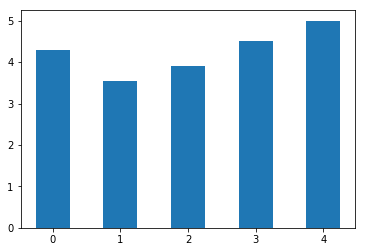

In [22]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from `0` to `6`). We only need tick labels on the x-axis where the bars are positioned. We can use [`Axes.set_xticks()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticks) to change the positions of the ticks to `[1, 2, 3, 4, 5]`:

```python
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
```

Then, we can use [`Axes.set_xticklabels()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) to specify the tick labels:

```python
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_xticklabels(num_cols)
```

If you look at the [documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) for the method, you'll notice that we can specify the orientation for the labels using the `rotation` parameter:

```python
ax.set_xticklabels(num_cols, rotation=90)
```

Rotating the labels by 90 degrees keeps them readable. In addition to modifying the x-axis tick positions and labels, let's also set the x-axis label, y-axis label, and the plot title.

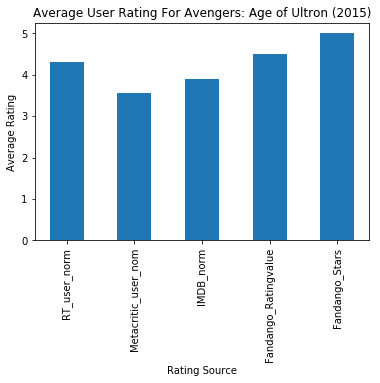

In [23]:
tick_positions = range(0,5)
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using `Axes.bar()`, we use [`Axes.barh()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.barh). This method has 2 required parameters, `bottom` and `width`. We use the `bottom` parameter to specify the y coordinate for the bottom sides for the bars and the `width` parameter to specify the lengths of the bars:

```python
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
ax.barh(bar_positions, bar_widths, 0.5)
```

To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use `Axes.set_yticks()` to set the y-axis tick positions to `[1, 2, 3, 4, 5]` and `Axes.set_yticklabels()` to set the tick labels to the column names:

```python
tick_positions = range(1,6)
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
```

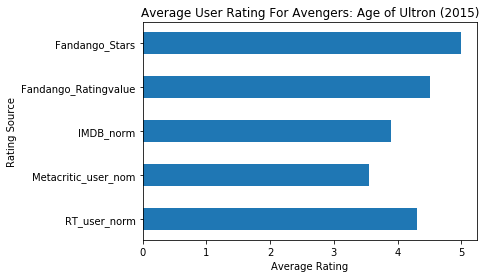

In [24]:
bar_widths = bar_heights
fig, ax = plt.subplots()

ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

Previously, the line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a **scatter plot**.

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use [`Axes.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter). The `scatter()` method has 2 required parameters, `x` and `y`, which matches the parameters of the `plot()` method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).

Let's start by creating a scatter plot that visualizes the relationship between the `Fandango_Ratingvalue` and `RT_user_norm` columns. We're looking for at least a weak correlation between the columns.

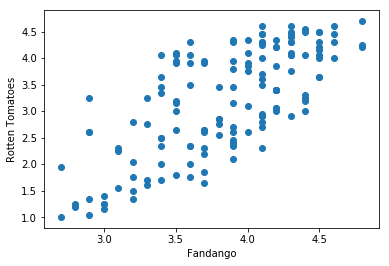

In [25]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

In our case, we're not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we're instead looking to understand how much they agree. Let's see what happens when we flip the columns:

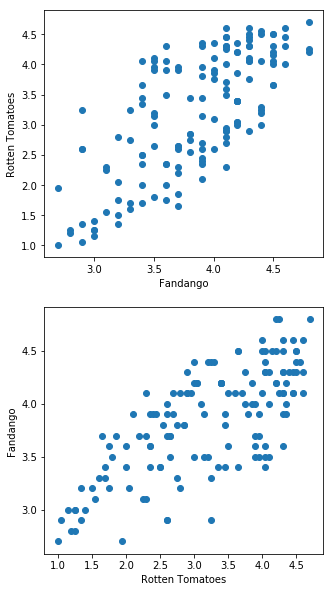

In [26]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_ylabel("Fandango")
ax2.set_xlabel("Rotten Tomatoes")

plt.show()

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing. Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated before, the ranges for both axes didn't match. We can use [`Axes.set_xlim()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlim) and [`Axes.set_ylim()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim) to set the data limits for both axes:

```python
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
```

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will constrained the axes to the `4` to `5` range:

```python
ax.set_xlim(4, 5)
ax.set_ylim(4, 5)
```

This makes small changes in the actual values in the data appear larger in the plot. A difference of `0.1` in a plot that ranges from `0` to `5` is hard to visually observe. A difference of `0.1` in a plot that only ranges from `4` to `5` is easily visible since the difference is 1/10th of the range.

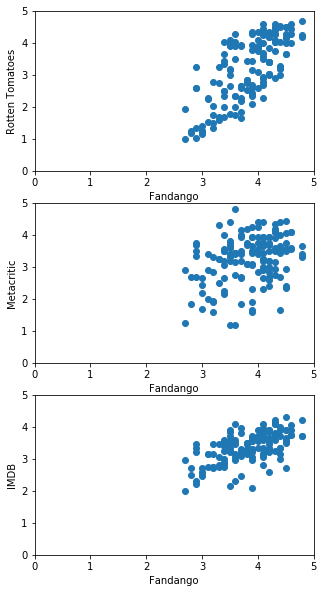

In [27]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. BUT SOON! We'll learn about two types of plots that help us understand distributions of values.

---

### Histograms And Box Plots
---

Now we'll learn how to visualize the distributions of user ratings using **histograms** and box **plots**.

Let's first compare the **frequency distributions** of user ratings from Fandango with those from IMDB using tables. A column's [frequency distribution](https://en.wikipedia.org/wiki/Frequency_distribution) consists of the unique values in that column along with the count for each of those values (or their frequency). We can use [`Series.value_counts()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to return the frequency distribution as Series object, the resulting Series object will be sorted by frequency in descending order:

In [28]:
norm_reviews['Fandango_Ratingvalue'].value_counts()

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

We can use `Series.sort_index()` to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object).

In [29]:
norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

Let's see the frequency distribution of the fandango ratings and imdb ratings:

In [30]:
fandango_distribution = norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index()
imdb_distribution = norm_reviews["IMDB_norm"].value_counts().sort_index()

print(fandango_distribution, imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64 2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the `Fandango_Ratingvalue` column ranges from 2.7 to 4.8 while the `IMDB_norm` column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

* What percent of the ratings are contained in the 2.0 to 4.0 range?
    * How does this compare with other sites?
* Which values represent the top 25% of the ratings? The bottom 25%?
    * How does this compare with other sites?

Comparing frequency distributions is also challenging because the `Fandango_Ratingvalue` column contains 21 unique values while `IMDB_norm` contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called **bins**. We can then sum the frequencies for the values that fall into each bin. The distributions for both of the columns are easier to compare with the shared x-axis (the bins). With them we can plot the bins along with the frequency sums as a bar plot. This type of plot is called a [**histogram**](https://en.wikipedia.org/wiki/Histogram). Let's dive right into creating a histogram in matplotlib.

We can generate a histogram using [`Axes.hist()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.hist). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

* calculate the minimum and maximum value from the sequence of values we passed in
* create 10 bins of equal length that span the range from the minimum to the maximum value
* group unique values into the bins
* sum up the associated unique values
* generate a bar for the frequency sum for each bin

The default behavior of `Axes.hist()` is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the `range` parameter to specify the range we want matplotlib to use as a tuple:

```python
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
```

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

(array([ 0.,  0.,  0.,  0.,  0.,  9., 25., 43., 53., 16.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

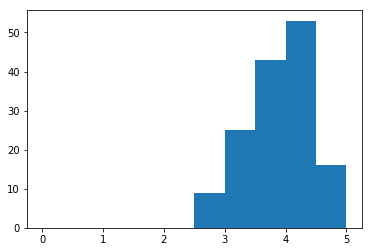

In [31]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range = (0, 5))

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The `bins` parameter for `Axes.hist()` is the 2nd positional parameter, but can also be specified as a named parameter:

```python
# Either of these will work.
ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0, 5))
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
```
Let's now generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using `Axes.set_ylim()`:

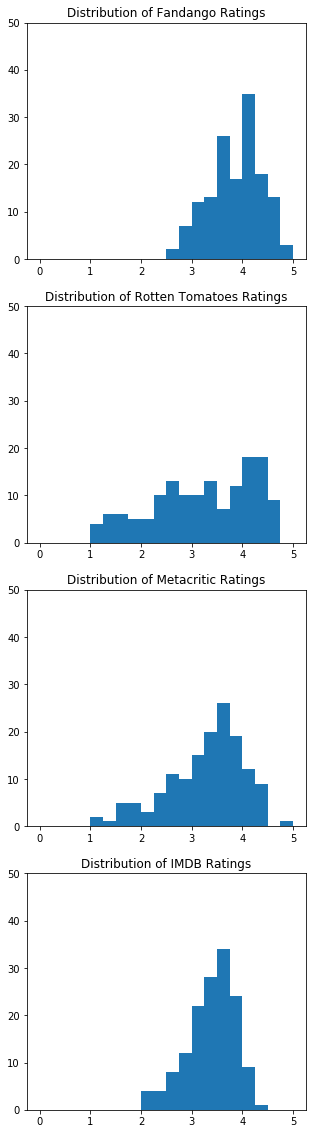

In [32]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title("Distribution of Fandango Ratings")

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0, 5))
ax3.set_title("Distribution of Metacritic Ratings")

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
ax4.set_title("Distribution of IMDB Ratings")

[ax.set_ylim(0, 50) for ax in [ax1, ax2, ax3, ax4]]

plt.show()

From the histograms, we can make the following observations:

* Around 50% of user ratings from Fandango fall in the 2 to 4 score range
* Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
* Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
* Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent [*quartiles*](https://en.wikipedia.org/wiki/Quartile). The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quartile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a box plot, also referred to as a [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot).

A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way. Here's a box plot of the values in the `RT_user_norm` column:

<img src="https://s3.amazonaws.com/dq-content/boxplot_intro.png" alt="boxplot_intro" width="600"/>

The two regions contained within the box in the middle make up the **interquartile range**, or IQR. The [IQR](https://en.wikipedia.org/wiki/Interquartile_range) is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

We can generate a boxplot using [`Axes.boxplot()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.boxplot).

```python
ax.boxplot(norm_reviews['RT_user_norm'])
```

Matplotlib will sort the values, calculate the quartiles that divide the values into four equal regions, and generate the box and whisker diagram.

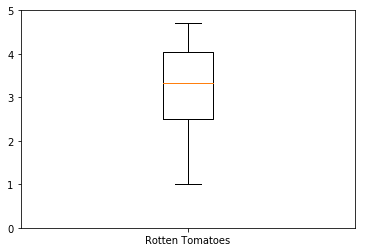

In [33]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews["RT_user_norm"])
ax.set_ylim(0, 5)
ax.set_xticklabels(["Rotten Tomatoes"])
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

* the bottom 25% of user ratings range from around 1 to 2.5
* the top 25% of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. When selecting multiple columns to pass in to `Axes.boxplot()`, we need to use the `values` accessor to return a multi-dimensional numpy array:

```python
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.boxplot(norm_reviews[num_cols].values)
```

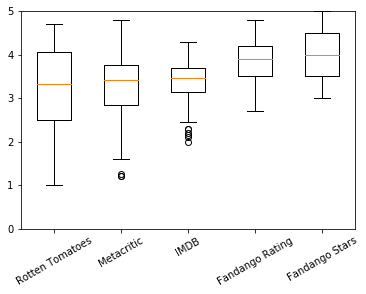

In [34]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(
    ["Rotten Tomatoes", "Metacritic", "IMDB", "Fandango Rating", "Fandango Stars"]
    , rotation = 30)
ax.set_ylim(0, 5)
plt.show()

From the boxplot, we can reach the following conclusions:

* user ratings from Rotten Tomatoes and Metacritic span a larger range of values
* user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

In addition, you may have noticed there are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called **outliers** or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.

# W E L L D O N E ! ! !